# Exploring Linear Regression

We will use a very clean dataset with only three columns (Gender, Height and Weight) and no null values to practice our linear regression skills.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

# read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/weight-height.csv')

# print the first 5 rows of the data set
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
# unique values of column Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

**Let's plot the distribution of height in males and females.**

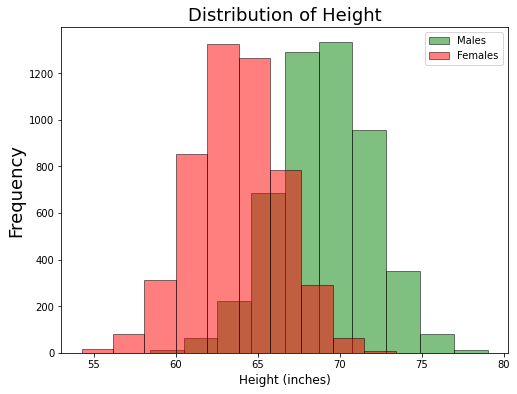

In [ ]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(8,6))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Frequency', size=18);

**Let's plot the distribution of weight in males and females.**

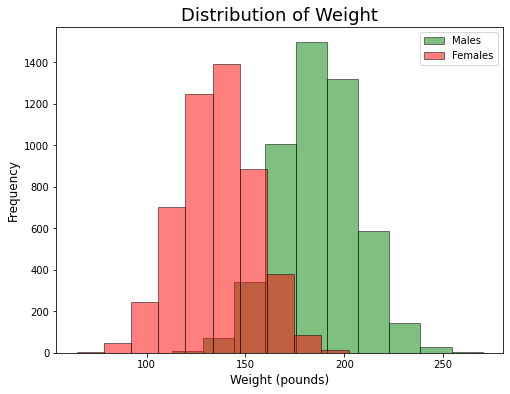

In [ ]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(8,6))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=18)
plt.xlabel('Weight (pounds)', size=12)
plt.ylabel('Frequency', size=12);

Observations: both height and weight present a normal distribution for males and females. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders.

There is a relation between height and weight? What plot can i use to confirm this relationship? Scatterplots show the relationship between two numerical features.

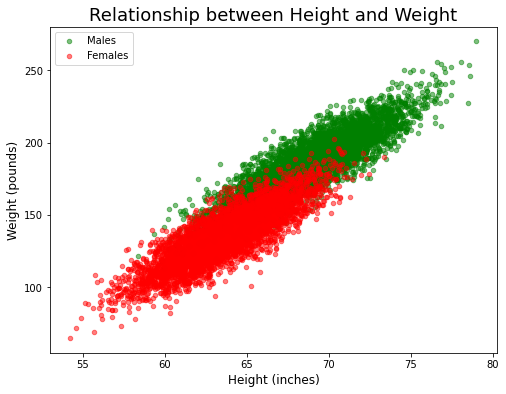

In [ ]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='green', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

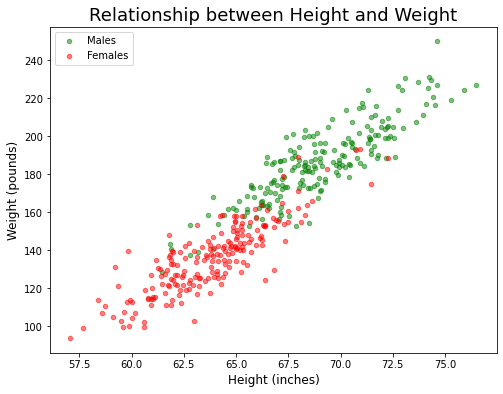

In [ ]:
# Scatter plot of a sample of Height and Weight

ax1 = df[df['Gender'] == 'Male'].sample(200).plot(kind='scatter', x='Height', y='Weight', color='green', alpha=0.5, figsize=(8, 6))
df[df['Gender'] == 'Female'].sample(200).plot(kind='scatter', x='Height', y='Weight', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

Do you notice the difference? It's because in the first graph large number of data points (5000 males and 5000 females) was making it difficult to visualize individual data points, so we decided to take just a sample of 200 from each.

Another reason to have difficult visualizations in scatterplots is when one of the variables is a discrete variable (small number of unique values).

**Can I use the height of a person to predict his weight?**

Using Numpy:

The numpy function polyfit numpy.polyfit(x,y,deg) fits a polynomial of degree deg to points (x, y), returning the polynomial coefficients that minimize the square error. In the following lines of code, we obtain the polynomials to predict the weight for females and males.

In [ ]:
import numpy as np

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
print('Slope and intercept for males:',male_fit)

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
print('Slope and intercept for females:',female_fit)

Slope and intercept for males: [   5.96177381 -224.49884071]
Slope and intercept for females: [   5.99404661 -246.01326575]


Using Scikit-learn:

In [ ]:
from sklearn.linear_model import LinearRegression


#### Males

df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])

# get the slope and intercept of the line best fit
print('Intercept for males:',lr_males.intercept_)
print('Slope for males:',lr_males.coef_)

#### Females

df_females = df[df['Gender'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print('Intercept for females:', lr_females.intercept_)
print('Scope for females:',lr_females.coef_)

Intercept for males: -224.49884070545863
Slope for males: [5.96177381]
Intercept for females: -246.01326574667254
Scope for females: [5.99404661]


Using Seaborn for visualization:

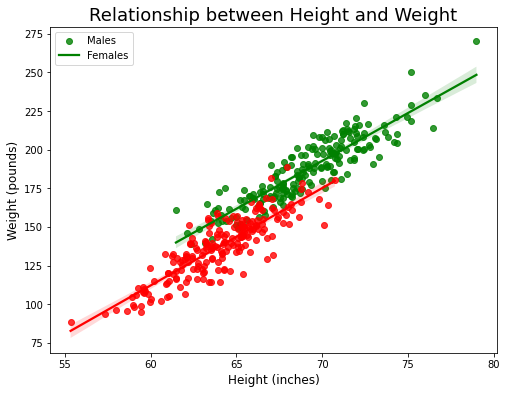

In [ ]:
import seaborn as sns

# 200 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(200)
df_females_sample = df[df['Gender'] == 'Female'].sample(200)

# regression plot using seaborn
fig = plt.figure(figsize=(8, 6))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='green')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='red')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

Observations: Both methods calculate the line that minimize the square error. The least square error finds the optimal parameter values by minimizing the sum S of squared errors. 

We can make predictions using the predict method with scikit-learn, and the polyval function with Numpy.

In [ ]:
# using numpy to predict the weight of the 61st individual 
print('With Numpy:', np.polyval(female_fit, [60]))

# using scikit learn to predict the weight of the 61st individual
print('With Scikit-learn:',lr_females.predict([[60]]))

With Numpy: [113.62953114]
With Scikit-learn: [113.62953114]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**How strong is the relation between height and weight in males?**

In [ ]:
# correlation coefficients 
print('Correlation between height and weight in males, using the .corr() method in a dataframe:')
df_males.corr()

Correlation between height and weight in males, using the .corr() method in a dataframe:


Height    Weight
Height  1.000000  0.862979
Weight  0.862979  1.000000

In [ ]:
from scipy import stats

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print('Correlation between height and weight in males, using Scipy:',pearson_coef)

Correlation between height and weight in males, using Scipy: 0.8629788486163177


So far we have used Pearson correlation coefficient and scatterplots to see if a linear regression would be appropiate to make predictions.
A different way to evaluate this is using residual plots.

Residual plots show the difference between actual and predicted values. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


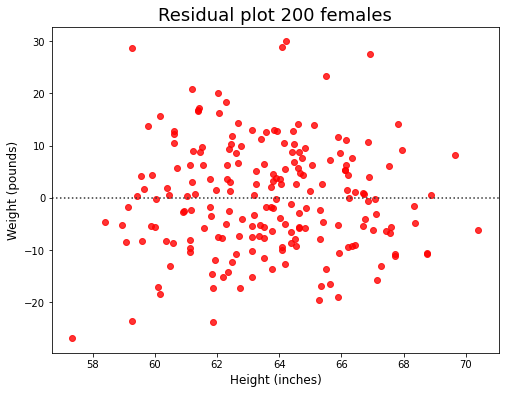

In [ ]:
import seaborn as sns

# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(200)

# residual plot 500 females
fig = plt.figure(figsize = (8, 6))
sns.residplot(df_females.Height, df_females.Weight, color='red')

# title and labels
plt.title('Residual plot 200 females', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

The points are randomly distributed around 0, meaning linear regression is an appropriate model to make predictions. 

**Using multiple regression to include more features**

In [ ]:
#first we need to encode our categorical feature: Gender
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
#verifying all features are numerical
df.head()

Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(df[['Height', 'Gender']], df['Weight'])

# get the intercept and slopes of the line that best fit.
print('Intercept:',mlr.intercept_)
print('Scopes:',mlr.coef_)

Intercept: -244.9235025206997
Scopes: [ 5.97694123 19.37771052]


Source: 

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c